# Displaying Matrix Equation M·Dv = Iv

This notebook demonstrates different ways to beautifully display the matrix equation **M·Dv = Iv**

In [1]:
from SLiCAP import *
from IPython.display import display, Markdown, Math, Latex
import sympy as sp
from sympy import latex, MatMul, symbols

initProject("Matrix Display")
print("✓ Setup complete")

Compiling library: SLiCAP.lib.
Compiling library: SLiCAPmodels.lib.
✓ Setup complete


## Example: Voltage Divider

In [2]:
# Load circuit and extract matrices
cir = makeCircuit('voltage_divider.cir')
result = doMatrix(cir)

M = result.M
Iv = result.Iv
Dv = result.Dv

print("Circuit loaded and matrices extracted")

Checking netlist: cir/voltage_divider.cir
Circuit loaded and matrices extracted


## Method 1: Display Components Separately

In [3]:
print("Matrix Equation: M · Dv = Iv")
print("="*70)

print("\nM (MNA Matrix) =")
display(M)

print("\nDv (Dependent Variables) =")
display(Dv)

print("\nIv (Independent Variables) =")
display(Iv)

Matrix Equation: M · Dv = Iv

M (MNA Matrix) =


Matrix([
[0,     1,           0],
[1,  1/R1,       -1/R1],
[0, -1/R1, 1/R2 + 1/R1]])


Dv (Dependent Variables) =


Matrix([
[ I_V1],
[ V_in],
[V_out]])


Iv (Independent Variables) =


Matrix([
[V_in],
[   0],
[   0]])

## Method 2: Display Complete Equation Using LaTeX

In [4]:
# Create LaTeX representation of the matrix equation
from sympy import latex

# Build the equation M * Dv = Iv
latex_M = latex(M)
latex_Dv = latex(Dv)
latex_Iv = latex(Iv)

# Create full equation
equation_latex = f"{latex_M} \\cdot {latex_Dv} = {latex_Iv}"

display(Markdown("### Complete Matrix Equation:"))
display(Math(equation_latex))

### Complete Matrix Equation:

<IPython.core.display.Math object>

## Method 3: Side-by-Side Display with Labels

In [5]:
# Display equation with labels
display(Markdown("### $\\mathbf{M} \\cdot \\mathbf{D_v} = \\mathbf{I_v}$"))

# Create labeled display
print("\n" + "="*70)
print("MNA Matrix (M):")
print("="*70)
display(M)

print("\nTIMES")
print("\n" + "="*70)
print("Dependent Variables (Dv):")
print("="*70)
display(Dv)

print("\nEQUALS")
print("\n" + "="*70)
print("Independent Variables (Iv):")
print("="*70)
display(Iv)

### $\mathbf{M} \cdot \mathbf{D_v} = \mathbf{I_v}$


MNA Matrix (M):


Matrix([
[0,     1,           0],
[1,  1/R1,       -1/R1],
[0, -1/R1, 1/R2 + 1/R1]])


TIMES

Dependent Variables (Dv):


Matrix([
[ I_V1],
[ V_in],
[V_out]])


EQUALS

Independent Variables (Iv):


Matrix([
[V_in],
[   0],
[   0]])

## Method 4: Using SymPy's Equation Display

In [6]:
from sympy import Eq

# Create symbolic equation
lhs = M * Dv  # Left-hand side: M · Dv
rhs = Iv       # Right-hand side: Iv

# Create equation object
equation = Eq(lhs, rhs)

display(Markdown("### Equation Object:"))
display(equation)

### Equation Object:

Eq(Matrix([
[                         V_in],
[    I_V1 + V_in/R1 - V_out/R1],
[V_out*(1/R2 + 1/R1) - V_in/R1]]), Matrix([
[V_in],
[   0],
[   0]]))

## Method 5: Pretty Print for Terminal

In [7]:
from sympy import pprint, init_printing
init_printing(use_unicode=True)

print("Matrix Equation (Pretty Print):")
print("\nM =")
pprint(M)

print("\nDv =")
pprint(Dv)

print("\nIv =")
pprint(Iv)

print("\nEquation: M · Dv = Iv")
print("="*70)

Matrix Equation (Pretty Print):

M =
⎡0   1      0   ⎤
⎢               ⎥
⎢   1      -1   ⎥
⎢1  ──     ───  ⎥
⎢   R₁     R₁   ⎥
⎢               ⎥
⎢   -1   1    1 ⎥
⎢0  ───  ── + ──⎥
⎣   R₁   R₂   R₁⎦

Dv =
⎡I_V1⎤
⎢    ⎥
⎢Vᵢₙ ⎥
⎢    ⎥
⎣Vₒᵤₜ⎦

Iv =
⎡Vᵢₙ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣ 0 ⎦

Equation: M · Dv = Iv


## Method 6: Expanded Matrix Equation

### Expanded Left-Hand Side (M · Dv):

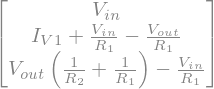

### Equals Right-Hand Side (Iv):

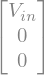

### Complete Expanded Equation:

<IPython.core.display.Math object>

In [8]:
# Show the multiplication result
result_product = M * Dv

display(Markdown("### Expanded Left-Hand Side (M · Dv):"))
display(result_product)

display(Markdown("### Equals Right-Hand Side (Iv):"))
display(Iv)

# Show complete expanded equation
display(Markdown("### Complete Expanded Equation:"))
expanded_eq = latex(result_product) + " = " + latex(Iv)
display(Math(expanded_eq))

## Method 7: Individual Equations from Matrix

In [9]:
# Extract individual equations from the matrix equation
print("Individual Equations:")
print("="*70)

lhs_expanded = M * Dv

for i in range(M.shape[0]):
    print(f"\nEquation {i+1}:")
    eq_latex = latex(lhs_expanded[i]) + " = " + latex(Iv[i])
    display(Math(eq_latex))

Individual Equations:

Equation 1:


<IPython.core.display.Math object>


Equation 2:


<IPython.core.display.Math object>


Equation 3:


<IPython.core.display.Math object>

## Method 8: Custom HTML Display

### M (MNA Matrix):

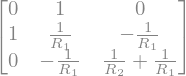

### Dv (Dependent Variables):

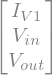

### Iv (Independent Variables):

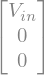

In [10]:
from IPython.display import HTML

# Create custom HTML display
html_content = f"""
<div style='font-size: 16px; padding: 20px; background-color: #f0f0f0; border-radius: 10px;'>
    <h3 style='color: #333;'>Matrix Equation: M · Dv = Iv</h3>
    <div style='display: flex; align-items: center; justify-content: space-around; margin-top: 20px;'>
        <div style='text-align: center;'>
            <p><strong>M</strong></p>
            <p style='font-family: monospace; font-size: 14px;'>MNA Matrix</p>
        </div>
        <div style='font-size: 24px; font-weight: bold;'>×</div>
        <div style='text-align: center;'>
            <p><strong>Dv</strong></p>
            <p style='font-family: monospace; font-size: 14px;'>Unknowns</p>
        </div>
        <div style='font-size: 24px; font-weight: bold;'>=</div>
        <div style='text-align: center;'>
            <p><strong>Iv</strong></p>
            <p style='font-family: monospace; font-size: 14px;'>Sources</p>
        </div>
    </div>
</div>
"""

display(HTML(html_content))

# Now show the actual matrices
print("\n")
display(Markdown("### M (MNA Matrix):"))
display(M)

display(Markdown("### Dv (Dependent Variables):"))
display(Dv)

display(Markdown("### Iv (Independent Variables):"))
display(Iv)

## Method 9: Numerical Example

### Numerical Matrix Equation:

#### $\mathbf{M} \cdot \mathbf{D_v} = \mathbf{I_v}$

<IPython.core.display.Math object>

### Solution (Dv = M⁻¹ · Iv):

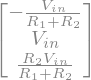

In [11]:
# Define parameters and show numerical matrices
cir.defPar('R1', 1000)
cir.defPar('R2', 2000)
cir.defPar('V_in', 10)

result_num = doMatrix(cir)
M_num = result_num.M
Iv_num = result_num.Iv
Dv_num = result_num.Dv

display(Markdown("### Numerical Matrix Equation:"))
display(Markdown("#### $\\mathbf{M} \\cdot \\mathbf{D_v} = \\mathbf{I_v}$"))

# Build and display numerical equation
latex_M_num = latex(M_num)
latex_Dv_num = latex(Dv_num)
latex_Iv_num = latex(Iv_num)

equation_num = f"{latex_M_num} \\cdot {latex_Dv_num} = {latex_Iv_num}"
display(Math(equation_num))

# Show solution
solution_num = M_num.inv() * Iv_num
display(Markdown("### Solution (Dv = M⁻¹ · Iv):"))
display(solution_num)

## Summary

We've demonstrated 9 different methods to display the matrix equation **M·Dv = Iv**:

1. **Separate components** - Show M, Dv, Iv individually
2. **LaTeX equation** - Complete equation in one line
3. **Side-by-side** - With labels and separators
4. **SymPy Equation** - Using Eq() object
5. **Pretty print** - Terminal-friendly ASCII art
6. **Expanded equation** - Show M·Dv explicitly
7. **Individual equations** - Each row separately
8. **Custom HTML** - Styled display
9. **Numerical example** - With actual values

### Best Methods for Jupyter:

✅ **Method 2** - LaTeX equation (most compact)
✅ **Method 6** - Expanded equation (shows multiplication)
✅ **Method 7** - Individual equations (detailed understanding)
✅ **Method 9** - Numerical example (concrete values)

All methods use built-in Jupyter rendering for beautiful mathematical display!